<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/GeneralForcasting1/GeneralForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline


In [25]:
df=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [29]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [31]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
test_predictions=fitted_model.forecast(36)

In [33]:
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

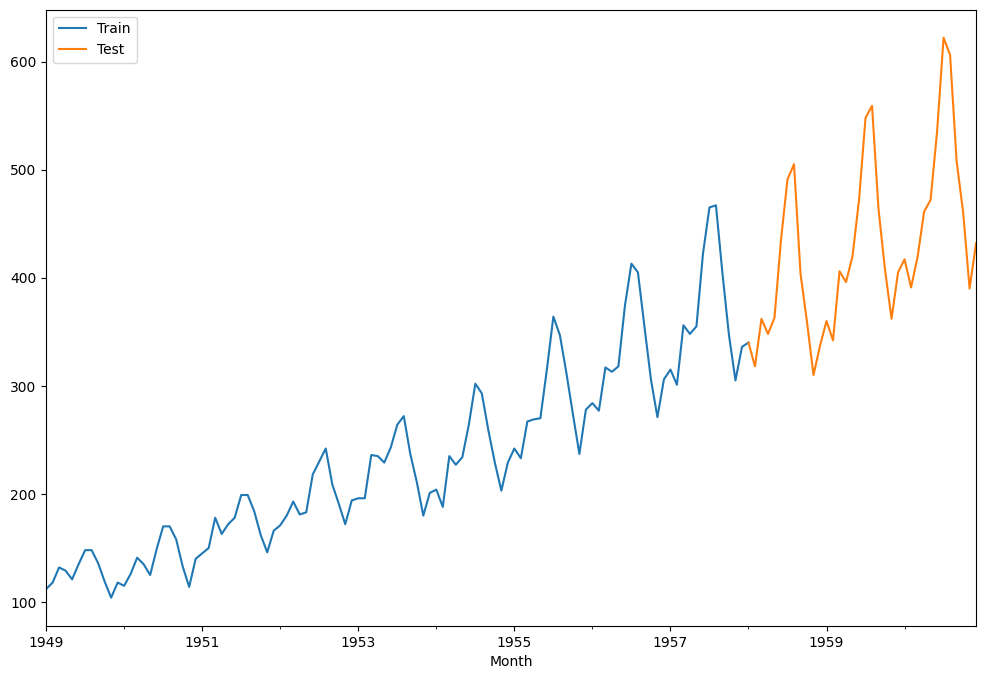

In [34]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
# test_predictions.plot()

<Axes: xlabel='Month'>

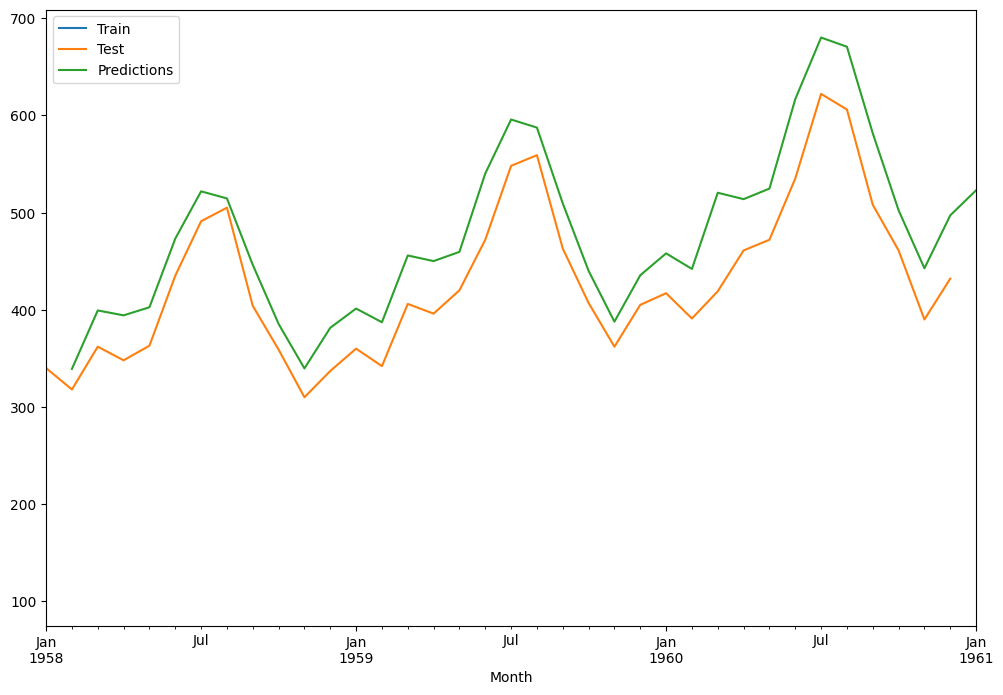

In [35]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predictions',xlim=['1958-01-01','1961-01-01'])

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [38]:
train_data.describe()

,Thousands of Passengers
count,109.000000
mean,231.899083
std,85.814393
min,104.000000
25%,166.000000
50%,227.000000
75%,293.000000
max,467.000000


In [39]:
test_predictions.describe()

count     36.000000
mean     478.308695
std       85.568266
min      339.142914
25%      402.211413
50%      458.775822
75%      522.061348
max      680.007127
dtype: float64

In [40]:
mean_absolute_error(test_data,test_predictions)

63.03104082299123

In [41]:
mean_squared_error(test_data,test_predictions)

5614.236501157957

In [42]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92820898138402

In [43]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [44]:
forcast_prediction=final_model.forecast(36)

<Axes: xlabel='Month'>

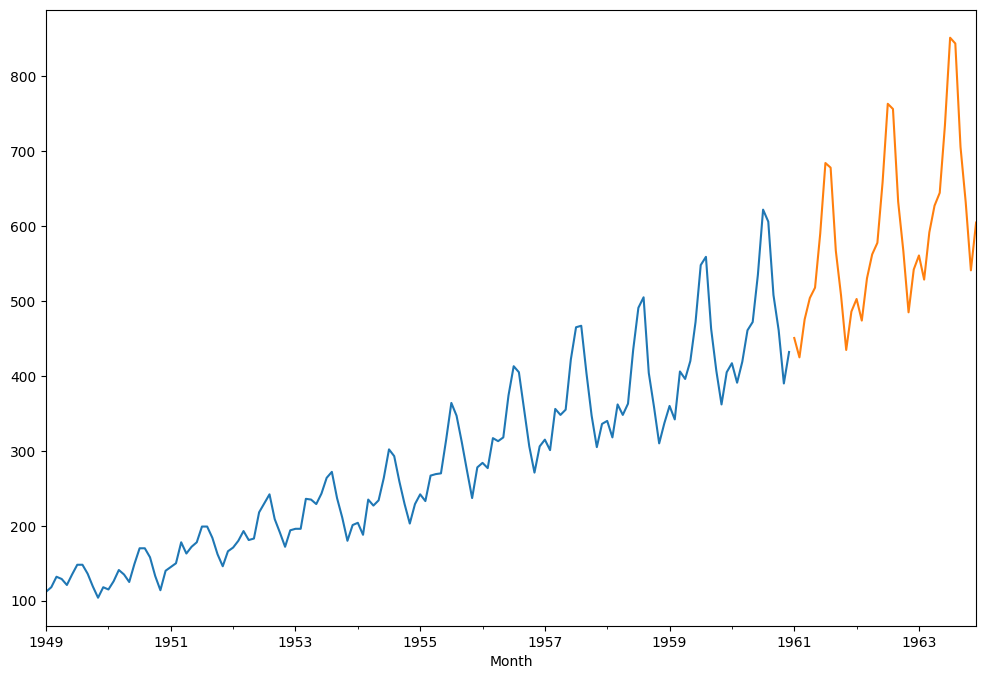

In [45]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forcast_prediction.plot()

In [46]:
df2=pd.read_csv('/content/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

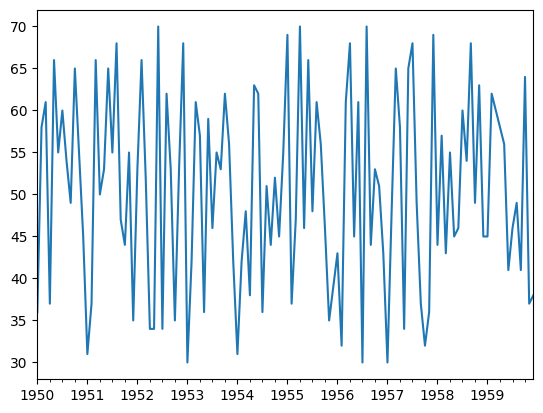

In [47]:
df2['a'].plot()

<Axes: >

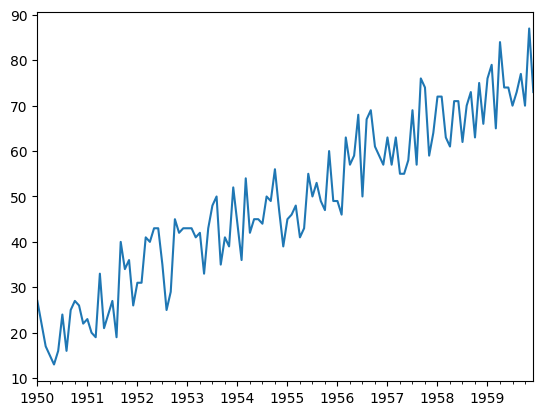

In [48]:
df2['b'].plot()

In [49]:
from statsmodels.tsa.statespace.tools import diff

<Axes: >

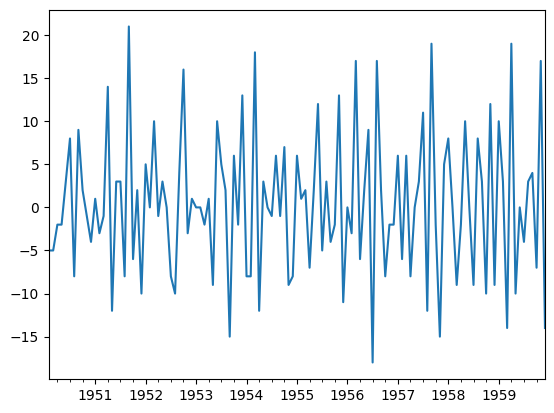

In [50]:
diff(df2['b'],k_diff=1).plot()

In [52]:
#Corilations
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf,pacf_yw, pacf_ols

In [53]:
df1=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [54]:
df2=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [56]:
df=pd.DataFrame({'a':[13,5,11,12,9]})
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [57]:
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [61]:
pacf_yw(df['a'],nlags=4)

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [64]:
pacf_ols(df['a'],nlags=4)

ValueError: nlags must be smaller than nobs // 2 (2)

In [66]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

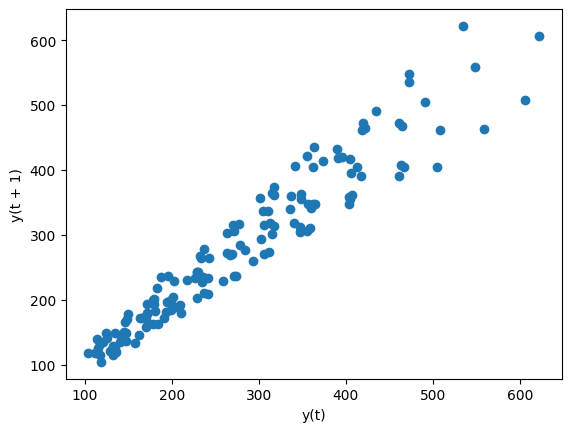

In [67]:
lag_plot(df1['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

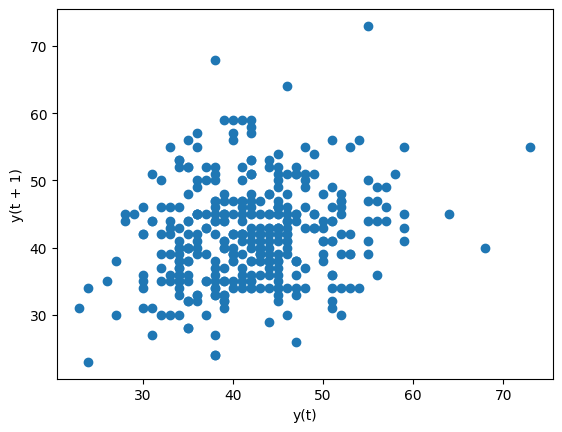

In [68]:
lag_plot(df2['Births'])

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

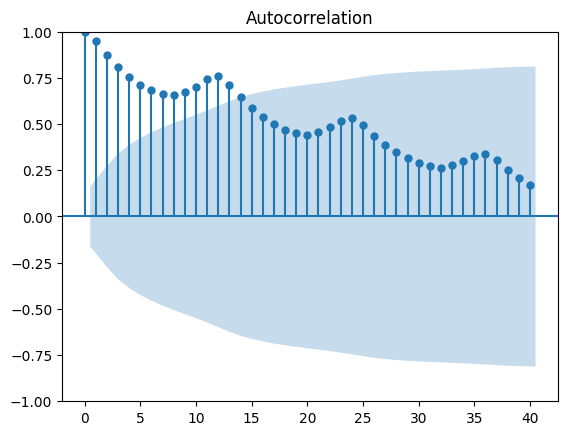

In [74]:
plot_acf(df1['Thousands of Passengers'],lags=40);

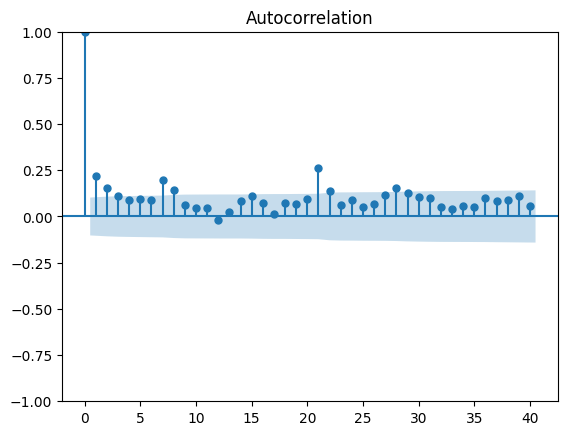

In [75]:
plot_acf(df2,lags=40);

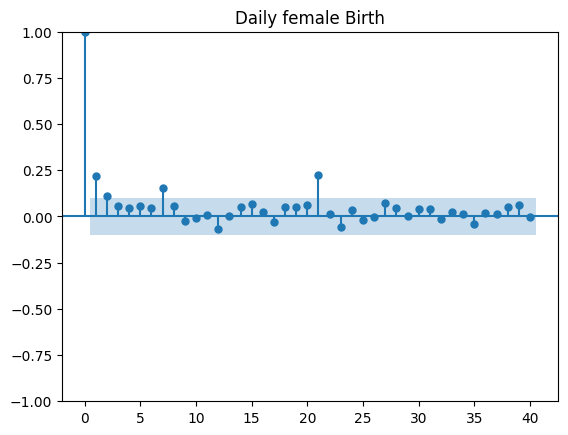

In [76]:
plot_pacf(df2,lags=40,title='Daily female Birth');